In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from operator import itemgetter
from nltk.tokenize import TweetTokenizer
from pprint import pprint

In [4]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tknzr = TweetTokenizer()
    ttokens = tknzr.tokenize(s)
    
    tokens = tokenize(" ".join(ttokens))
    if lowercase:
        #tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
        tokens = [token.lower() for token in tokens if token.isalpha()]
        tokens = set(tokens)
    return list(tokens)
 
tweet = 'RT  Example @marcobonzanini: just an example! :D http://example.com #NLP\u2025'
print(preprocess(tweet))
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://exampl

[u'rt', u'example', u'just', u'an']


In [5]:
stoplist = set([line.replace("\n","") for line in open('/Users/alinamazi/Data/stopword-list2.txt')])
pun = [',', '-','.', ':', '(', ')', '--', ';', '...', '?','today','follow','stats','can', 'say', 'says', 'will','may', 'must', 'us', 'via','a','the', 'rt', 'gg', 'gt', 'lt', 'la', 'de', 'te', 'lol', 'follow', 'followers', 'unfollow', 'unfollowers', 'unfollower', 'follower']

with open('/Users/alinamazi/Data/common_list.txt','rt') as myfile:
    common_word = myfile.read().splitlines()


In [6]:
f = open("/Users/alinamazi/Data/results/April/Exp1/ua.txt")
#f = open("/Users/alinamazi/Data/results/04_11_14/Exp1/ua_new.txt")


#search_word = 'south'
tweets_data = []
com = defaultdict(lambda : defaultdict(int))
count_search = Counter()
tweet_tokens = []
ngrams_tokens = []

for line in f:
    tweets_data.append(line.replace("\n", ""))

    terms_only = [term for term in preprocess(line) 
                      if term not in stoplist and term not in common_word and term not in pun
                      and not term.startswith(('#', '@')) and 'http' not in term]
    
    terms_ngrams = [term for term in preprocess(line) 
                      if term not in pun
                      and 'http' not in term]
                
                #if count < 20: 
                #    print tweet['text']
                #    print terms_only
    tweet_tokens += terms_only
    ngrams_tokens += terms_ngrams
                
    for i in range(len(terms_only)-1):            
        #for j in range(i+1, len(terms_only)):
        for j in range(len(terms_only)-1):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1

#    if search_word in terms_only:
#        count_search.update(terms_only)


In [7]:
len(tweet_tokens)

148824

In [8]:
len(ngrams_tokens)

292480

## Using NLTK Bigrams and FreqDist to show most common frequent words

In [26]:
## Using NLTK Bigrams to show most common frequent words
from nltk import bigrams,trigrams, ngrams
from nltk.probability import *

n = 2
ngrams_tokens = tweet_tokens
terms_bigram = ngrams(ngrams_tokens, n)
terms_bigram

%matplotlib inline
pairs = [ " ".join(pair) for pair in terms_bigram]
#frequent bigrams
fdist = FreqDist(pairs)
bigr = fdist.keys()
fifty_popular_bigr = fdist.most_common(20)
# print fifty_popular_bigr
#fdist.plot(5)
#pairs

pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)



In [27]:
fifty_popular_bigr

[(u'decided overbook', 1619),
 (u'random plane', 1618),
 (u'plane decided', 1615),
 (u'passengers random', 1607),
 (u'force passengers', 1607),
 (u'words man', 388),
 (u'poor words', 386),
 (u'united flight', 294),
 (u'overbook force', 259),
 (u'united airlines', 247),
 (u'treat overbooked', 210),
 (u'overbooked trying', 209),
 (u'doctor treat', 208),
 (u'dragged man', 208),
 (u'paying customers', 199),
 (u'friendly skies', 196),
 (u'flight doctor', 194),
 (u'violently seat', 164),
 (u'doctor violently', 163),
 (u'seat due', 163)]

### Plot the results using Pandas Plotting
**Bigrams
*Trigrams
*Ngrams

In [11]:
pd_common = pd.DataFrame()
pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)

In [24]:
pd_common

,count,bigram
0,1619,decided overbook
1,1618,random plane
2,1615,plane decided
3,1607,passengers random
4,1607,force passengers
5,388,words man
6,386,poor words
7,294,united flight
8,259,overbook force
9,247,united airlines


In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data1 = [go.Bar(
            x= pd_common['bigram'],
            y= pd_common['count']
    )]

layout = go.Layout(
    xaxis=dict(
        #title='AXIS TITLE',
        titlefont=dict(
            family='Times',
            size=12,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=90,
        tickfont=dict(
            family='Times',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
    margin=go.Margin(
#     l=250,
#     r=50,
    b=150,
#         t=100,
        pad=4

)
)
fig = {
    'data': data,
    'layout': layout,
}

py.iplot(fig)

In [31]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x= pd_common['bigram'],
            y= pd_common['count']
    )]

layout = go.Layout(
    xaxis=dict(
        #title='AXIS TITLE',
        titlefont=dict(
            family='Times',
            size=12,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=90,
        tickfont=dict(
            family='Times',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
    margin=go.Margin(
#     l=250,
#     r=50,
    b=150,
#         t=100,
        pad=4

)
)
fig = {
    'data': data,
    'layout': layout,
}

py.iplot(fig)

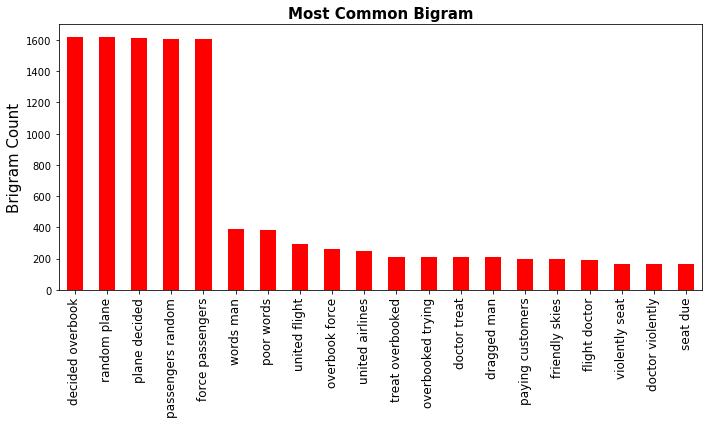

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common Bigram', fontsize=15, fontweight='bold')
ax.set_ylabel('Brigram Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],rotation=90, fontsize=12)
plt.tight_layout()
# plt.savefig('../TDI/bigrams_ua.png')

[(u'random plane decided', 1615), (u'force passengers random', 1605), (u'passengers random plane', 1605), (u'plane decided overbook', 1605), (u'poor words man', 386), (u'decided overbook force', 247), (u'overbook force passengers', 237), (u'treat overbooked trying', 209), (u'doctor treat overbooked', 207), (u'due asian watched', 163), (u'violently seat due', 163), (u'seat due asian', 163), (u'passenger removed flight', 155), (u'doctor violently seat', 155), (u'flight doctor violently', 155), (u'removed flight doctor', 155), (u'asian watched overbo', 155), (u'united flight screw', 139), (u'flight screw husband', 139), (u'man force passengers', 119)]


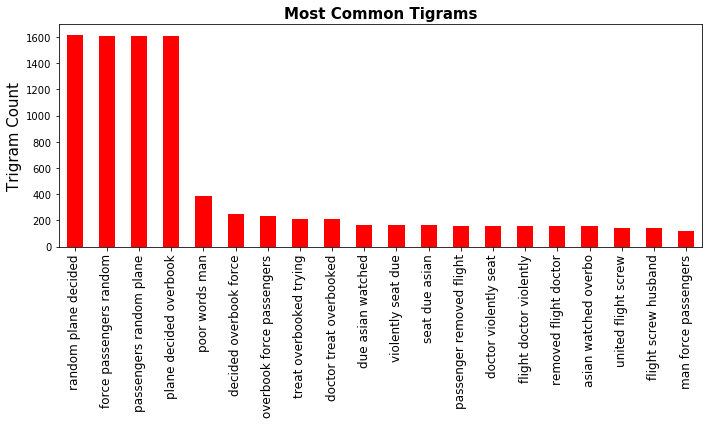

In [30]:
n = 3
terms_bigram = ngrams(ngrams_tokens, n)
terms_bigram

%matplotlib inline
pairs = [ " ".join(pair) for pair in terms_bigram]
#frequent bigrams
fdist = FreqDist(pairs)
bigr = fdist.keys()
fifty_popular_bigr = fdist.most_common(20)
print fifty_popular_bigr

pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)

fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Trigram Count' , fontsize=15)
ax.set_title('Most Common Tigrams', fontsize=15, fontweight='bold')

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],fontsize=12)

plt.tight_layout()
# plt.savefig('../TDI/trigrams_ua.png')

[(u'force passengers random plane', 1605), (u'random plane decided overbook', 1605), (u'passengers random plane decided', 1605), (u'plane decided overbook force', 247), (u'overbook force passengers random', 237), (u'decided overbook force passengers', 225), (u'doctor treat overbooked trying', 207), (u'seat due asian watched', 163), (u'violently seat due asian', 163), (u'doctor violently seat due', 155), (u'due asian watched overbo', 155), (u'flight doctor violently seat', 155), (u'removed flight doctor violently', 155), (u'passenger removed flight doctor', 155), (u'united flight screw husband', 139), (u'man force passengers random', 119), (u'slogan wake changes southwest', 113), (u'training united leaked airlines', 107), (u'united leaked airlines press', 107), (u'airlines here quickly friendly', 95)]


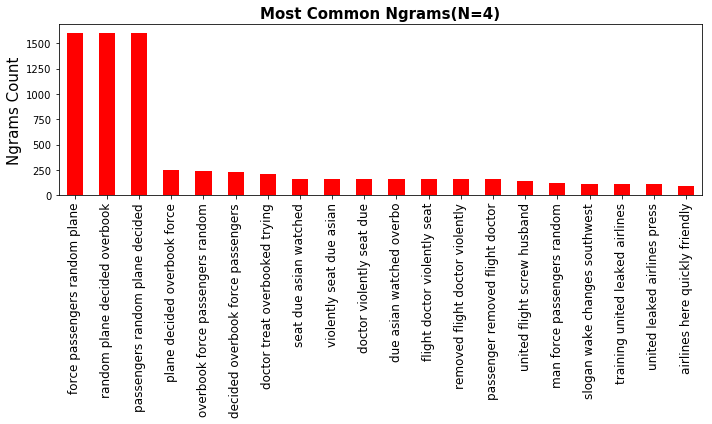

In [14]:
n = 4
terms_bigram = ngrams(ngrams_tokens, n)
terms_bigram

%matplotlib inline
pairs = [ " ".join(pair) for pair in terms_bigram]
#frequent bigrams
fdist = FreqDist(pairs)
bigr = fdist.keys()
fifty_popular_bigr = fdist.most_common(20)
print fifty_popular_bigr

pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)

fig, ax = plt.subplots(figsize=(10,6))
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common Ngrams(N=4)', fontsize=15, fontweight='bold')
ax.set_ylabel('Ngrams Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
#ax.set_xticklabels(pd_common['bigram'],rotation=60)
ax.set_xticklabels(pd_common['bigram'],fontsize=12)

plt.tight_layout()
plt.savefig('../TDI/ngrams_ua.png')

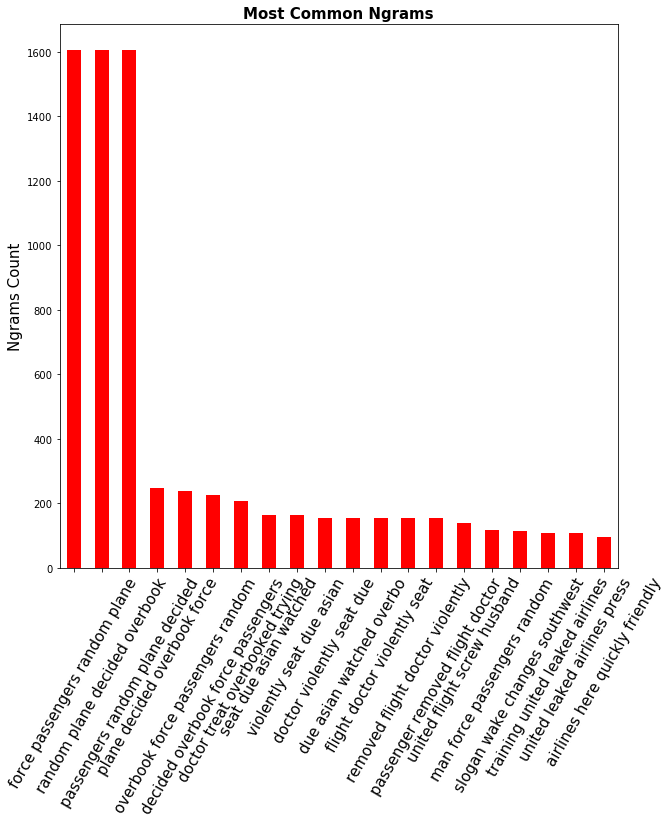

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common Ngrams', fontsize=15, fontweight='bold')
ax.set_ylabel('Ngrams Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],rotation=60,fontsize=15)

In [135]:
fdist = FreqDist(tweet_tokens)
fdist.freq('officer')

0.06885544915640675

In [118]:
fdist

FreqDist()

In [134]:
l = fdist.max()
l

u'officer'

### Finding most common words of the cluster using FreqDist

In [7]:
#Making dictionary
words_only = [w for w in tweet_tokens if w.isalpha()]
dic = set([w.lower() for w in words_only])
word_count = len(dic)
print word_count

10745


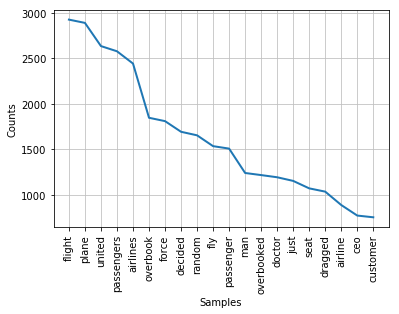

In [13]:
#Plot the frequencies
fdist = FreqDist(tweet_tokens)
pf = fdist.plot(20) # Plots word + frequency
#fdist.plot(20,cumulative=True) # Plots word + cumulative freq.
#pf.savefig("test.jpg")

In [11]:
type(pf)

NoneType